# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install mediapipe


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def draw_landmarks(image, results):
    # Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)

    # Draw pose landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Draw left hand landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    # Draw right hand landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_landmarks(frame, results)

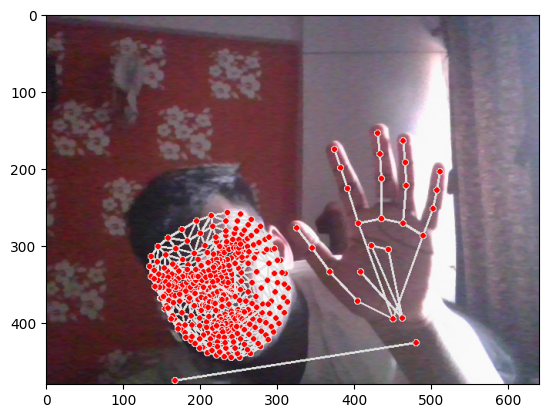

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
import numpy as np

# Check if face_landmarks exist before accessing them
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)  # 468 landmarks * 3 (x, y, z)


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.38360056,  0.7629478 , -1.22650218, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.38360056,  0.7629478 , -1.22650218, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [25]:
# Get only directories (ignore files like .npy)
sequences = sorted(
    [d for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))],
    key=lambda x: int(x)
)[:2]  # Limit to 2 videos per action

for sequence in sequences:
    sequence_path = os.path.join(action_path, sequence)

    if not os.path.isdir(sequence_path):  # Ensure it's a folder
        continue

    window = []
    for frame_num in range(sequence_length):
        npy_file = os.path.join(sequence_path, f"{frame_num}.npy")
        if os.path.exists(npy_file):
            res = np.load(npy_file)
            window.append(res)
        else:
            window.append(np.zeros(1662))  # Handle missing frames

    sequences.append(window)
    labels.append(label_map[action])  # Map the action to its label


In [26]:
import os

# Define the updated path where your dataset is stored
dataset_path = r"C:\Users\sumit\Downloads\archive\dataset\SL"  # Updated path

# Extract the list of words (actions) from folder names
actions = sorted(os.listdir(dataset_path))  # Gets all folder names as action labels

# Create a label mapping for the extracted actions
label_map = {label: num for num, label in enumerate(actions)}

print("Total Actions:", len(actions))
print("Sample Actions:", actions[:10])  # Print first 10 actions for verification
print("Label Map Sample:", {k: label_map[k] for k in list(label_map)[:10]})  # Show a sample of the mapping


Total Actions: 2000
Sample Actions: ['a', 'a lot', 'abdomen', 'able', 'about', 'above', 'accent', 'accept', 'accident', 'accomplish']
Label Map Sample: {'a': 0, 'a lot': 1, 'abdomen': 2, 'able': 3, 'about': 4, 'above': 5, 'accent': 6, 'accept': 7, 'accident': 8, 'accomplish': 9}


# 5. Collect Keypoint Values for Training and Testing

In [28]:
import os
import cv2
import numpy as np
import mediapipe as mp

# MediaPipe setup
mp_holistic = mp.solutions.holistic

# Dataset path (update if needed)
DATASET_PATH = r"C:\Users\sumit\Downloads\archive\dataset\SL"
SAVE_PATH = "MP_Data"  # Where processed data will be stored

# Ensure save directory exists
os.makedirs(SAVE_PATH, exist_ok=True)

# Extract actions dynamically
actions = sorted(os.listdir(DATASET_PATH))

# Define sequence length
sequence_length = 30  # Adjust based on FPS

# Function to extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Process videos
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        action_path = os.path.join(DATASET_PATH, action)
        if not os.path.isdir(action_path):
            continue

        # Get list of video files (limit to 2 per action)
        videos = sorted([f for f in os.listdir(action_path) if f.endswith('.mp4')])[:2]

        for idx, video_file in enumerate(videos):
            video_path = os.path.join(action_path, video_file)
            cap = cv2.VideoCapture(video_path)

            sequence = []
            frame_count = 0

            while cap.isOpened() and frame_count < sequence_length:
                ret, frame = cap.read()
                if not ret:
                    break  # End of video

                # Convert color (OpenCV uses BGR, MediaPipe needs RGB)
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                # Make detections
                results = holistic.process(image)

                # Extract keypoints
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)

                frame_count += 1

            cap.release()

            # Ensure sequences are saved correctly
            if len(sequence) == sequence_length:
                save_dir = os.path.join(SAVE_PATH, action, str(idx))
                os.makedirs(save_dir, exist_ok=True)
                np.save(os.path.join(save_dir, "keypoints.npy"), np.array(sequence))
                print(f"✅ Saved: {os.path.join(save_dir, 'keypoints.npy')}")

print("🎉 Processing Complete! Keypoints saved in 'MP_Data'.")


✅ Saved: MP_Data\a\0\keypoints.npy
✅ Saved: MP_Data\a\1\keypoints.npy
✅ Saved: MP_Data\a lot\0\keypoints.npy
✅ Saved: MP_Data\a lot\1\keypoints.npy
✅ Saved: MP_Data\abdomen\0\keypoints.npy
✅ Saved: MP_Data\abdomen\1\keypoints.npy
✅ Saved: MP_Data\able\0\keypoints.npy
✅ Saved: MP_Data\able\1\keypoints.npy
✅ Saved: MP_Data\about\0\keypoints.npy
✅ Saved: MP_Data\about\1\keypoints.npy
✅ Saved: MP_Data\above\0\keypoints.npy
✅ Saved: MP_Data\above\1\keypoints.npy
✅ Saved: MP_Data\accent\0\keypoints.npy
✅ Saved: MP_Data\accent\1\keypoints.npy
✅ Saved: MP_Data\accept\0\keypoints.npy
✅ Saved: MP_Data\accident\0\keypoints.npy
✅ Saved: MP_Data\accident\1\keypoints.npy
✅ Saved: MP_Data\accomplish\0\keypoints.npy
✅ Saved: MP_Data\accomplish\1\keypoints.npy
✅ Saved: MP_Data\accountant\0\keypoints.npy
✅ Saved: MP_Data\accountant\1\keypoints.npy
✅ Saved: MP_Data\across\0\keypoints.npy
✅ Saved: MP_Data\across\1\keypoints.npy
✅ Saved: MP_Data\act\0\keypoints.npy
✅ Saved: MP_Data\act\1\keypoints.npy
✅ Sa

In [29]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'a': 0,
 'a lot': 1,
 'abdomen': 2,
 'able': 3,
 'about': 4,
 'above': 5,
 'accent': 6,
 'accept': 7,
 'accident': 8,
 'accomplish': 9,
 'accountant': 10,
 'across': 11,
 'act': 12,
 'action': 13,
 'active': 14,
 'activity': 15,
 'actor': 16,
 'adapt': 17,
 'add': 18,
 'address': 19,
 'adjective': 20,
 'adjust': 21,
 'admire': 22,
 'admit': 23,
 'adopt': 24,
 'adult': 25,
 'advanced': 26,
 'advantage': 27,
 'adverb': 28,
 'affect': 29,
 'afraid': 30,
 'africa': 31,
 'after': 32,
 'afternoon': 33,
 'again': 34,
 'against': 35,
 'age': 36,
 'agenda': 37,
 'ago': 38,
 'agree': 39,
 'agreement': 40,
 'ahead': 41,
 'aid': 42,
 'aim': 43,
 'airplane': 44,
 'alarm': 45,
 'alcohol': 46,
 'algebra': 47,
 'all': 48,
 'all day': 49,
 'allergy': 50,
 'alligator': 51,
 'allow': 52,
 'almost': 53,
 'alone': 54,
 'alphabet': 55,
 'already': 56,
 'also': 57,
 'always': 58,
 'amazing': 59,
 'america': 60,
 'amputate': 61,
 'analyze': 62,
 'anatomy': 63,
 'and': 64,
 'angel': 65,
 'angle': 66,
 'angry'

In [37]:
import os
import numpy as np

# ✅ Use the correct path where keypoints were saved
DATA_PATH = r"C:\Users\sumit\Downloads\MP_Data"  

# Extract actions dynamically (folders in MP_Data)
actions = sorted([d for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))])

# Create label mapping
label_map = {label: num for num, label in enumerate(actions)}

sequence_length = 30  # Number of frames per sequence

sequences, labels = [], []

for action in actions:
    action_path = os.path.join(DATA_PATH, action)

    # ✅ Ensure action folder exists
    if not os.path.exists(action_path):
        print(f"⚠ Warning: Action folder '{action}' not found, skipping...")
        continue

    # ✅ Get valid sequence subdirectories
    sequence_folders = sorted([d for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))])[:2]  # 2 videos per action

    for sequence in sequence_folders:
        sequence_path = os.path.join(action_path, sequence)

        window = []
        for frame_num in range(sequence_length):
            npy_file = os.path.join(sequence_path, f"{frame_num}.npy")

            if os.path.exists(npy_file):
                res = np.load(npy_file)
            else:
                res = np.zeros(1662)  # Handle missing frames
            
            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])

print(f"✅ Loaded {len(sequences)} sequences from {len(actions)} actions.")


✅ Loaded 3865 sequences from 1993 actions.


In [38]:
np.array(sequences).shape

(3865, 30, 1662)

In [39]:
np.array(labels).shape

(3865,)

In [40]:
X = np.array(sequences)

In [41]:
X.shape

(3865, 30, 1662)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [44]:
y_test.shape

(194, 1993)

# 7. Build and Train LSTM Neural Network

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Ensure actions is a NumPy array
if not isinstance(actions, np.ndarray):
    actions = np.array(actions)

# Define model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))  # Ensure correct output shape

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1993)           │        65,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662,345 (2.53 MB)

 Trainable params: 662,345 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [91]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# Ensure X_train and y_train are NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Define callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
tb_callback = TensorBoard(log_dir='logs')

# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32, callbacks=[tb_callback, early_stopping])


Epoch 1/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - categorical_accuracy: 6.4824e-04 - loss: 7.5776
Epoch 2/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - categorical_accuracy: 6.0130e-04 - loss: 7.5727
Epoch 3/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - categorical_accuracy: 0.0000e+00 - loss: 7.5737
Epoch 4/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - categorical_accuracy: 0.0000e+00 - loss: 7.5778
Epoch 5/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - categorical_accuracy: 0.0010 - loss: 7.5738
Epoch 6/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - categorical_accuracy: 3.6106e-04 - loss: 7.5764
Epoch 7/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - categorical_accuracy: 4.2006e-04 - loss: 7.5729
Epoch 8/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - categorical_accuracy: 0.0000e+00 - loss: 7.5713
Epoch 9/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - categorical_accuracy: 5.8057e-04 - loss: 7.5694
Epoch 10/2000
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - 

In [92]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1993)           │        65,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,987,037 (7.58 MB)

 Trainable params: 662,345 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,324,692 (5.05 MB)

# 8. Make Predictions

In [93]:
res = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [94]:
actions[np.argmax(res[4])]

'me'

In [95]:
actions[np.argmax(y_test[4])]

'snack'

# 9. Save Weights

In [96]:
model.save('action.h5')

In [97]:
del model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1993, activation='softmax'))  # Match saved model
  # Ensure 'actions' is defined

# Load the weights
model.load_weights('action.h5')


In [101]:
import numpy as np
actions = np.array(sorted(os.listdir(r"C:\Users\sumit\Downloads\archive\dataset\SL")))


In [102]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [103]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [104]:
yhat = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [105]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [106]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1.,   0.]],

       [[193.,   0.],
        [  1

In [108]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test in Real Time

In [109]:
from scipy import stats

In [110]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [111]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Normalize probabilities
    res = np.squeeze(res)  # Ensure res is 1D

    for num, prob in enumerate(res):
        prob_value = float(prob)  # Convert NumPy value to Python float
        bar_width = int(prob_value * 100)  # Convert probability to width
        
        cv2.rectangle(output_frame, (0, 60 + num * 40), (bar_width, 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (5, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame


In [112]:
print("Shape of res:", res.shape)  # Debugging
print("Type of res:", type(res))


Shape of res: (194, 1993)
Type of res: <class 'numpy.ndarray'>


In [114]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Ensure res is a 1D array
    res = np.squeeze(res)  
    if len(res.shape) > 1:
        print("Error: res has more than 1 dimension", res.shape)
        return output_frame  # Return original frame to prevent crashing

    for num, prob in enumerate(res):
        prob_value = float(prob)  # Convert NumPy value to Python float
        bar_width = int(prob_value * 100)  # Convert probability to width

        cv2.rectangle(output_frame, (0, 60 + num * 40), (bar_width, 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (5, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame


In [ ]:
print("res shape:", res.shape)
print("Number of actions:", len(actions))
print("Number of colors:", len(colors))


res shape: (194, 1993)
Number of actions: 2000
Number of colors: 3


In [158]:
# Ensure colors list matches the number of actions
if len(colors) < len(actions):
    # Extend with random distinct colors to avoid repetition
    additional_colors = [(0, 255, 0)] * (len(actions) - len(colors))
    colors.extend(additional_colors)
elif len(colors) > len(actions):
    colors = colors[:len(actions)]  # Trim if too many


In [159]:
import numpy as np
import cv2

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    res = np.squeeze(res)  # Ensure res is a flat 1D array

    # Debugging
    print(f"🔍 res shape: {res.shape}, actions count: {len(actions)}, colors count: {len(colors)}")

    # Ensure the number of probabilities matches actions
    num_classes = min(len(res), len(actions), len(colors))

    # Normalize probabilities to improve visualization
    if np.max(res) > 0:
        res = res / np.max(res)  # Scale values between 0 and 1

    for num in range(num_classes):
        prob_value = float(res[num])  # Convert NumPy float to Python float
        bar_width = int(prob_value * 300)  # Scale bar width for visibility

        # Draw probability bars
        cv2.rectangle(output_frame, (10, 60 + num * 40), (10 + bar_width, 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, f"{actions[num]}: {prob_value:.2f}", (15, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


res shape: (1993,)
Number of actions: 1993
🔍 res shape: (1993,), actions count: 1993, colors count: 1993


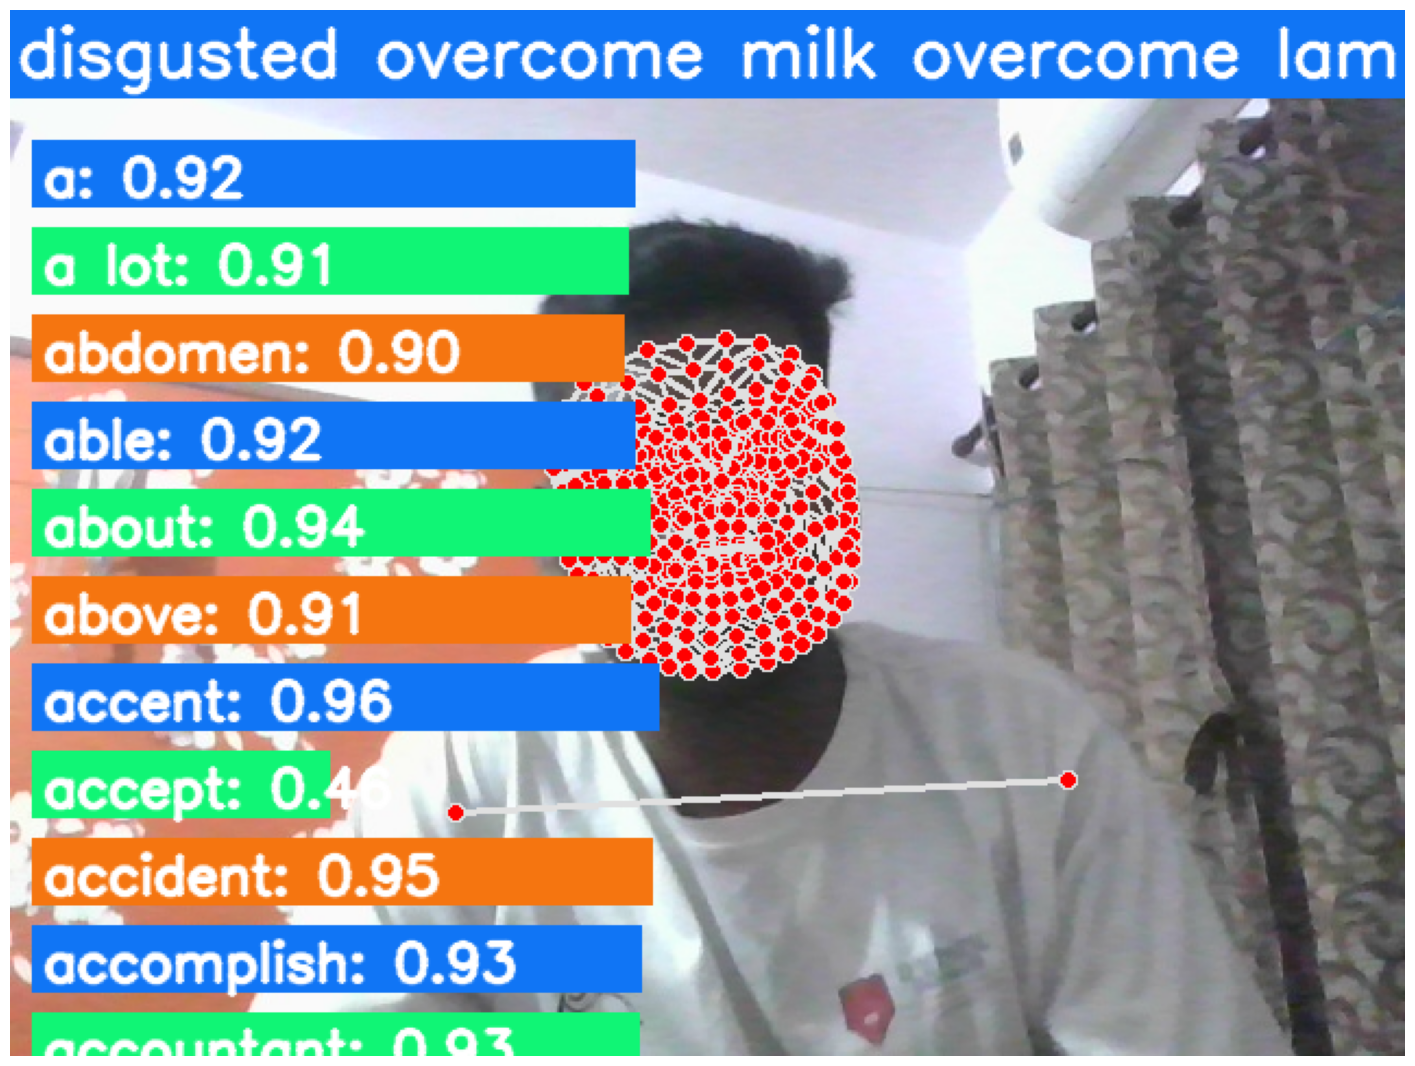

In [160]:
# Ensure res is a 1D array and not empty
if res is None or len(res) == 0:
    print("⚠️ Warning: res is empty! Skipping visualization.")
    res = np.zeros(len(actions))  # Assign a default zero array

res = np.squeeze(res).flatten()

# Debugging
print("res shape:", res.shape)
print("Number of actions:", len(actions))

# Match res length with actions
if len(res) < len(actions):
    print(f"⚠️ Warning: res has fewer elements ({len(res)}), padding with zeros.")
    res = np.pad(res, (0, len(actions) - len(res)), mode='constant')
elif len(res) > len(actions):
    print(f"⚠️ Warning: res has more elements ({len(res)}), truncating.")
    res = res[:len(actions)]

# Ensure colors match actions
if len(colors) < len(actions):
    colors = (colors * ((len(actions) // len(colors)) + 1))[:len(actions)]

plt.figure(figsize=(18, 18))
output_image = prob_viz(res, actions, image, colors)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [161]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.0005  # Reduced threshold for better predictions

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]

            if len(actions) != res.shape[0]:
                actions = actions[:len(res)]  # Match shape to avoid errors

            predicted_index = np.argmax(res)
            predicted_action = actions[predicted_index] if np.max(res) > threshold else "None"

            print(f"🔍 Max Probability: {np.max(res)}")
            print(f"📌 Predicted Action: {predicted_action}")

            predictions.append(predicted_index)
            
            # 3. Viz logic
            if np.unique(predictions[-10:])[0] == predicted_index:
                if np.max(res) > threshold: 
                    
                    if len(sentence) > 0: 
                        if predicted_action != sentence[-1]:
                            sentence.append(predicted_action)
                    else:
                        sentence.append(predicted_action)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            if len(actions) != res.shape[0]:
                actions = actions[:len(res)]  # Ensure shape consistency
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [138]:
keypoints = extract_keypoints(results)
print("Extracted Keypoints Shape:", keypoints.shape)
print("Sample Keypoints:", keypoints[:10])


Extracted Keypoints Shape: (1662,)
Sample Keypoints: [ 0.44506803  0.68442273 -0.84132373  0.99992388  0.46274215  0.62097603
 -0.80577737  0.99985629  0.47732425  0.61663091]


In [139]:
if len(sequence) == 30:
    res = model.predict(np.expand_dims(sequence, axis=0))[0]
    print("Prediction Probabilities:", res)
    print("Max Probability:", np.max(res))

    if np.max(res) > 0.5:  # Adjust threshold if needed
        print("Predicted Action:", actions[np.argmax(res)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction Probabilities: [0.00053913 0.0005313  0.00053237 ... 0.00054281 0.00054821 0.00027223]
Max Probability: 0.00057948934


In [140]:
if len(sequence) == 30:
    print("Model is predicting...")
    res = model.predict(np.expand_dims(sequence, axis=0))[0]


Model is predicting...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [142]:
if np.max(res) > 0.3:  # Reduce threshold from 0.5 to 0.3
    sentence.append(actions[np.argmax(res)])


In [143]:
print("Res Shape:", res.shape, "Actions Length:", len(actions))
output_image = prob_viz(res, actions, image, colors)


Res Shape: (1993,) Actions Length: 2000


In [144]:
if np.max(res) > 0.0005:  # Reduce threshold
    sentence.append(actions[np.argmax(res)])
